# 🩺 Thérapie par protons & Pic de Bragg : Expérience interactive
## *Basé sur la physique de Bethe-Bloch*

**Objectif :** Ajuster l’énergie du faisceau de protons pour que la dose (pic de Bragg) atteigne la tumeur !

Dans la vraie vie, les médecins utilisent des faisceaux de protons pour cibler les tumeurs avec une grande précision. Vous allez faire la même chose, <br> en utilisant l’**équation de Bethe-Bloch**, qui décrit comment les protons perdent de l’énergie dans les tissus.

## Contexte physique
- **Équation de Bethe-Bloch** : décrit comment les particules chargées perdent de l’énergie dans la matière  
- Les protons déposent la majorité de leur énergie au niveau du **pic de Bragg** – à la fin de leur parcours  
- En ajustant l’énergie du faisceau, on contrôle la profondeur de pénétration dans l’eau ou les tissus  
- Calculs de physique médicale réels !

Explorons la physique des particules appliquée à la médecine... 👩‍⚕️👨‍⚕️⚛️


## 📚 Configuration : Importer les modules nécessaires




In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

- `%matplotlib inline` : permet d’afficher directement les graphiques dans le notebook.  
- `%reload_ext autoreload` et `%autoreload 2` : permettent de recharger automatiquement les modules Python si vous les modifiez, sans avoir à redémarrer le notebook.


Commençons par importer notre modèle de physique Bethe-Bloch et les outils de visualisation :

In [2]:
# Imports standard
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from IPython.display import display, clear_output

# Nos modules personnalisés avec la physique de Bethe-Bloch
from src.proton_physics import ProtonBeam, Tumor
from src.visualization import ProtonTherapyPlotter, display_instructions, create_summary_stats

print("✅ Moteur de physique Bethe-Bloch chargé !")
print("Prêt à commencer l'expérience de protonthérapie avec la vraie physique !")


✅ Moteur de physique Bethe-Bloch chargé !
Prêt à commencer l'expérience de protonthérapie avec la vraie physique !


## 🎯 Configuration de l’expérience

Créons notre scénario patient avec des propriétés de tissu équivalent à l’eau. Aujourd’hui, nous avons une tumeur située à 3.2 cm de profondeur qui doit être ciblée avec précision grâce aux calculs Bethe-Bloch !


In [3]:
# Initialiser le modèle physique Bethe-Bloch pour l’eau/tissu
proton_beam = ProtonBeam(medium='water')

# Créer notre patient avec une tumeur à 3.2 cm de profondeur
patient_tumor = Tumor(center_depth_cm=3.2, width_cm=0.1)

# Créer un tableau de profondeurs pour les calculs (0 à 10 cm)
depths = np.linspace(0, 10, 500)


# Initialiser le traceur
plotter = ProtonTherapyPlotter(figsize=(14, 10))

print(f"Mise en place du patient complète avec la physique Bethe-Bloch !")
print(f"Position de la tumeur : {patient_tumor.center_depth} cm de profondeur")
print(f"Largeur de la tumeur : {patient_tumor.width} cm")
print(f"Médium : tissu équivalent à l’eau (ρ=1.0 g/cm³, I=75 eV)")
print("\nPrêt pour la planification du traitement...")


Mise en place du patient complète avec la physique Bethe-Bloch !
Position de la tumeur : 3.2 cm de profondeur
Largeur de la tumeur : 0.1 cm
Médium : tissu équivalent à l’eau (ρ=1.0 g/cm³, I=75 eV)

Prêt pour la planification du traitement...


## 📋 Instructions pour l'expérience


In [4]:
display_instructions()


    🔬 EXPÉRIENCE DE THÉRAPIE PROTONIQUE 🔬

    MISSION : Ajustez l'énergie du faisceau de protons pour atteindre la tumeur avec le pic de Bragg !

    INSTRUCTIONS :
    1. Utilisez le curseur d'énergie ci-dessous pour modifier l'énergie du faisceau de protons
    2. Observez comment la position du pic de Bragg change dans le graphique
    3. Essayez de positionner le pic exactement sur la tumeur rouge
    4. Plus vous vous rapprochez, meilleur est le traitement !

    FAITS PHYSIQUES :
    • Énergie plus élevée → les protons pénètrent plus profondément
    • Énergie plus faible → les protons s'arrêtent plus tôt
    • Le pic de Bragg est l'endroit où les protons déposent le plus d'énergie
    • Les vrais médecins utilisent ceci pour cibler les tumeurs avec précision !

    Prêt à sauver la situation ? 🦸‍♂️🦸‍♀️
    


## 🎚️ Expérience Interactive : Contrôle de l'Énergie

Utilisez le curseur ci-dessous pour ajuster l'énergie du faisceau de protons et observez comment le pic de Bragg se déplace !

**Votre mission :** Faites en sorte que la ligne rouge pointillée (pic de Bragg) atteigne la boîte rouge de la tumeur ! 🎯


In [5]:
def interactive_proton_therapy(energy_mev):
    """
    Interactive function that updates the plot when energy changes.
    """
    # Clear previous output for clean display
    clear_output(wait=True)
    
    # Calculate Bragg curve for current energy
    dose_profile = proton_beam.calculate_bragg_curve(energy_mev, depths)
    
    # Get peak position
    peak_position = proton_beam.get_peak_position(energy_mev)
    
    # Create the plot
    plotter.plot_bragg_curve_with_tumor(
        depths, dose_profile, patient_tumor, 
        peak_position, energy_mev, max_depth=10
    )
    
    # Display summary statistics
    summary = create_summary_stats(peak_position, patient_tumor.center_depth, energy_mev)
    print(summary)

# Create interactive widget
energy_slider = FloatSlider(
    value=120,  # Starting energy
    min=0,     # Minimum energy (MeV)
    max=250,    # Maximum energy (MeV) 
    step=0.1,     # Energy step size
    description='Energy (MeV):',
    style={'description_width': 'initial'},
    continuous_update=False  # Only update when slider is released
)

# Launch interactive experiment
interact(interactive_proton_therapy, energy_mev=energy_slider)

print("\n🎮 Use the slider above to control the proton beam energy!")

interactive(children=(FloatSlider(value=120.0, continuous_update=False, description='Energy (MeV):', max=250.0…


🎮 Use the slider above to control the proton beam energy!


## 📊 Pouvoir d'arrêt Bethe-Bloch

Explorons la physique fondamentale : comment le pouvoir d'arrêt selon Bethe-Bloch varie avec l'énergie des protons :


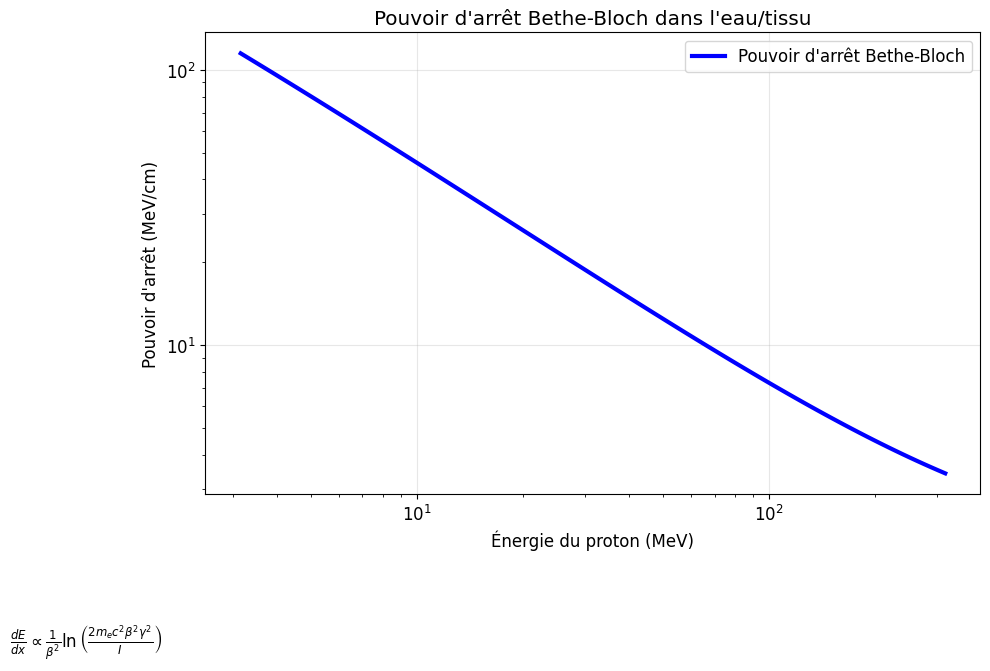

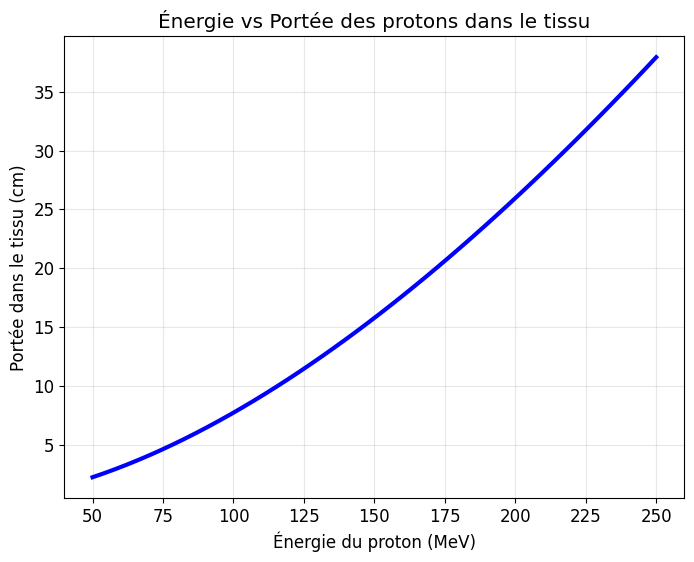

Key Bethe-Bloch Parameters for Water:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Mean excitation energy (I): 75 eV
Z/A ratio: 0.5551
Density: 1.0 g/cm³

Energy → Range Examples:
 70 MeV →  4.1 cm (β=0.366)
100 MeV →  7.7 cm (β=0.428)
150 MeV → 15.8 cm (β=0.507)
200 MeV → 26.0 cm (β=0.566)

🎯 Target tumor at 3.2 cm needs ~8 MeV


In [6]:
# Calculate Bethe-Bloch stopping power vs energy
test_energies = np.logspace(0.5, 2.5, 100)  # 3 to 300 MeV
stopping_powers = proton_beam.bethe_bloch_stopping_power(test_energies)

# Plot the Bethe-Bloch curve
plotter.plot_stopping_power_curve(test_energies, stopping_powers)

# Calculate energy-range relationship
practical_energies = np.linspace(50, 250, 50)
ranges = [proton_beam.energy_to_range(E) for E in practical_energies]

# Plot energy vs range
plotter.plot_energy_vs_range(practical_energies, ranges)

# Show some key physics values
print("Key Bethe-Bloch Parameters for Water:")
print("━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━")
print(f"Mean excitation energy (I): {proton_beam.I*1e6:.0f} eV")
print(f"Z/A ratio: {proton_beam.Z_A:.4f}")
print(f"Density: {proton_beam.rho:.1f} g/cm³")
print("\nEnergy → Range Examples:")
for energy in [70, 100, 150, 200]:
    range_val = proton_beam.energy_to_range(energy)
    physics = proton_beam.get_detailed_physics_info(energy)
    print(f"{energy:3.0f} MeV → {range_val:4.1f} cm (β={physics['beta']:.3f})")

print(f"\n🎯 Target tumor at {patient_tumor.center_depth} cm needs ~{proton_beam.energy_to_range(100):.0f} MeV")

## Trouvez l'energie! 

Quelle énergie peut être utilisée pour frapper une tumeur à une profondeur connue ?

In [7]:
from scipy.optimize import root_scalar

def energy_for_depth(target_depth, E_min=10, E_max=300):
    """
    Find proton energy needed to reach a given depth in cm.
    
    Args:
        target_depth: desired depth in cm
        E_min, E_max: search range in MeV
        
    Returns:
        energy in MeV
    """
    def f(E):
        return proton_beam.energy_to_range(E) - target_depth

    sol = root_scalar(f, bracket=[E_min, E_max], method='bisect')
    if sol.converged:
        return sol.root
    else:
        raise ValueError("Could not find energy for the target depth.")

# Example usage:
tumor_depth = patient_tumor.center_depth  # in cm
required_energy = energy_for_depth(tumor_depth)
print(f"🎯 Proton energy to target tumor at {tumor_depth:.1f} cm: {required_energy:.1f} MeV")


🎯 Proton energy to target tumor at 3.2 cm: 61.2 MeV


## Correction d'energie 

Corrigeons l'énergie du proton après son passage dans l'air

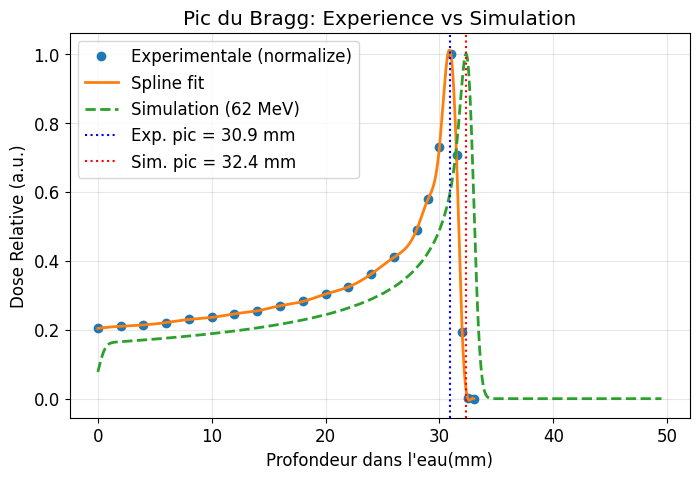

In [8]:
from src.analysis import compare_bragg_peak


compare_bragg_peak("/home/zzaher/Downloads/62mev_peak.txt", energy_mev=62, x_extend_factor=1.5, num_points=1000)

In [124]:
import numpy as np

def energy_after_air(E0_MeV, path_cm=100, beam_model=None):
    """
    Compute the energy of a proton after traveling through air using Bethe-Bloch.
    
    Parameters:
        E0_MeV : float
            Initial proton energy in MeV
        path_cm : float
            Air path length in cm
        beam_model : ProtonBeam
            Your proton beam object with a stopping_power(E, medium) method
            
    Returns:
        E_final : float
            Energy after traveling through air in MeV
        delta_E : float
            Energy lost in air in MeV
    """
    if beam_model is None:
        raise ValueError("You must provide a ProtonBeam model.")
    
    # Small steps for numerical integration
    dz = 0.1  # cm
    z_steps = int(path_cm / dz)
    
    E = E0_MeV
    for _ in range(z_steps):
        dE = beam_model.bethe_bloch_stopping_power(E) * dz
        E -= dE
        if E <= 0:
            E = 0
            break
    
    delta_E = E0_MeV - E
    return E, delta_E

# Example usage
beam = ProtonBeam(medium="air")  # your model
E0 = 62
E_final, delta_E = energy_after_air(E0, path_cm=100, beam_model=beam)
print(f"Energy lost in 1 m of air: {delta_E:.2f} MeV")
print(f"Energy entering water: {E_final:.2f} MeV")


Energy lost in 1 m of air: 1.30 MeV
Energy entering water: 60.70 MeV


In [18]:
E0 = 62  # énergie initiale en MeV
path_cm = 100  # longueur d'air en cm (1 mètre)
dz = 0.1  # pas en cm

In [19]:
E = E0

In [20]:
for i in range(int(path_cm/dz)):
    dE = beam.bethe_bloch_stopping_power(E) * dz
    E -= dE
    if E <= 0:
        E = 0
        break


In [17]:
beam = ProtonBeam(medium="air")

In [24]:
delta_E = E0 - E
print(f"Énergie perdue dans l’air : {delta_E:.3f} MeV")
print(f"Énergie qui entre dans l’eau : {E:.3f} MeV")


Énergie perdue dans l’air : 1.297 MeV
Énergie qui entre dans l’eau : 60.703 MeV
